In [1]:
from monk import *
import torch
from torch import optim
from torch.optim import lr_scheduler
from Monk.TorchNet import SimpleNN


In [2]:
# setup cuda for torch

if torch.cuda.is_available():
    print("Cuda is available")
    device = torch.device("cuda")
else:
    print("Cuda is not available")
    device = torch.device("cpu")
    
torch.set_default_device(device)


Cuda is available


# Monk 1

In [3]:
parameter_grid = {
    "learning_rate": np.linspace(0.01, 0.6, 50),
    "momentum": [0.0, 0.9, 0.8, 0.7],
    "nesterov": [True, False]
}
print(parameter_grid)

{'learning_rate': array([0.01      , 0.02204082, 0.03408163, 0.04612245, 0.05816327,
       0.07020408, 0.0822449 , 0.09428571, 0.10632653, 0.11836735,
       0.13040816, 0.14244898, 0.1544898 , 0.16653061, 0.17857143,
       0.19061224, 0.20265306, 0.21469388, 0.22673469, 0.23877551,
       0.25081633, 0.26285714, 0.27489796, 0.28693878, 0.29897959,
       0.31102041, 0.32306122, 0.33510204, 0.34714286, 0.35918367,
       0.37122449, 0.38326531, 0.39530612, 0.40734694, 0.41938776,
       0.43142857, 0.44346939, 0.4555102 , 0.46755102, 0.47959184,
       0.49163265, 0.50367347, 0.51571429, 0.5277551 , 0.53979592,
       0.55183673, 0.56387755, 0.57591837, 0.58795918, 0.6       ]), 'momentum': [0.0, 0.9, 0.8, 0.7], 'nesterov': [True, False]}


In [4]:
#try random seeds
lowest_loss = 1
lowest_avg_loss = 1
for lr in parameter_grid["learning_rate"]:
    for momentum in parameter_grid["momentum"]:
        for nesterov in parameter_grid["nesterov"]:
            if nesterov and momentum == 0:
                continue
            loss_across_seeds = []
            acc_across_seeds = []
            overfit_across_seeds = []
            for seed in [18, 30, 42, 69, 100]:
                torch.manual_seed(seed)
                model = SimpleNN(17, 3, 1)
                optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov and momentum > 0)
                overfit, acc, loss, = monk("monks-1", optimizer=optimizer, neural_network=model, num_epochs=500,
                                           lr_scheduler=None,
                                           verbose=False)
                loss_across_seeds.append(loss)
                acc_across_seeds.append(acc)
                overfit_across_seeds.append(overfit)
                if acc > 0.99 and overfit < 0.04:
                    if loss < lowest_loss:
                        lowest_loss = loss
                        print(
                            f"New best seed: 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, loss: {loss}, acc: {acc}, overfit: {overfit}, seed: {seed}")

            avg_acc = np.mean(acc_across_seeds)
            avg_loss = np.mean(loss_across_seeds)
            if avg_acc > 0.99 and avg_loss < lowest_avg_loss and np.mean(overfit_across_seeds) < 0.04:
                lowest_avg_loss = avg_loss
                print(f"New best across: 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, loss: {np.mean(loss_across_seeds)}, acc: {np.mean(acc_across_seeds)}")


New best seed: 3 neuron lr: 0.08224489795918366, momentum: 0.9, nesterov: True, loss: 0.02068835310637951, acc: 0.9907407407407407, overfit: 0.03528546854801266, seed: 42
New best seed: 3 neuron lr: 0.09428571428571426, momentum: 0.9, nesterov: True, loss: 0.019011424854397774, acc: 0.9907407407407407, overfit: 0.03478798312258668, seed: 42
New best seed: 3 neuron lr: 0.10632653061224488, momentum: 0.9, nesterov: True, loss: 0.017465587705373764, acc: 0.9907407407407407, overfit: 0.03427822610734107, seed: 42
New best seed: 3 neuron lr: 0.10632653061224488, momentum: 0.9, nesterov: True, loss: 0.016545318067073822, acc: 1.0, overfit: 0.038975811781866085, seed: 69
New best seed: 3 neuron lr: 0.10632653061224488, momentum: 0.9, nesterov: False, loss: 0.016261663287878036, acc: 1.0, overfit: 0.0390733524305703, seed: 69
New best seed: 3 neuron lr: 0.1183673469387755, momentum: 0.9, nesterov: True, loss: 0.01485773827880621, acc: 1.0, overfit: 0.03822373808893167, seed: 69
New best seed: 

Overfitting Score: 0.0338


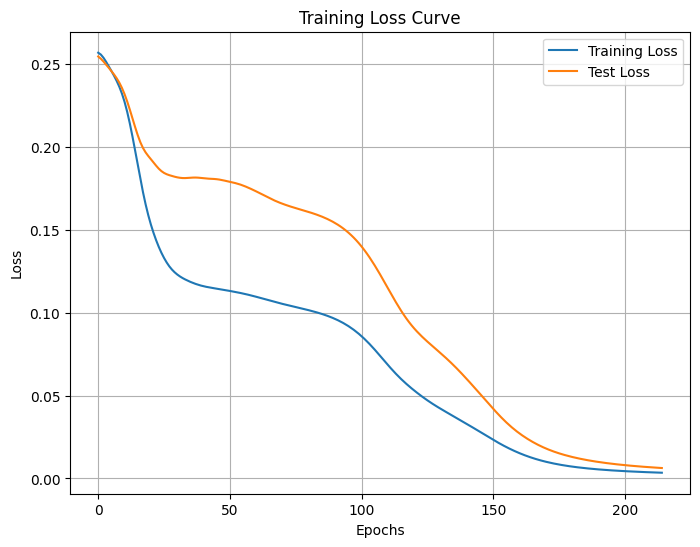

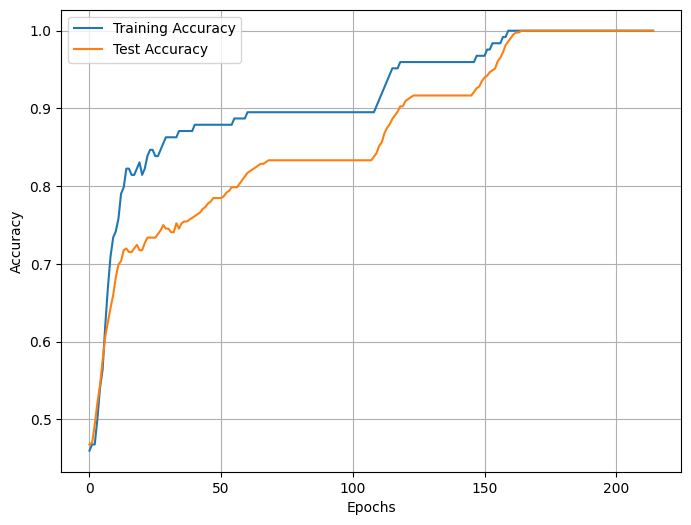

(0.033847231364830636, 1.0, 0.006310084369033575)

In [5]:
lr = 0.5687755102040817
momentum = 0.85
nesterov = False
epochs = 500
torch.manual_seed(30)
model = SimpleNN(17, 3, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov)
monk("monks-1", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=None)

# Monk 2

In [6]:
#try random seeds
lowest_loss = 1
lowest_avg_loss = 1

for lr in parameter_grid["learning_rate"]:
    for momentum in parameter_grid["momentum"]:
        for nesterov in parameter_grid["nesterov"]:
            if nesterov and momentum == 0:
                continue
            loss_across_seeds = []
            acc_across_seeds = []
            overfit_across_seeds = []
            for seed in [18, 30, 42, 69, 100]:
                torch.manual_seed(seed)
                model = SimpleNN(17, 3, 1)
                optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov and momentum > 0)
                overfit, acc, loss, = monk("monks-2", optimizer=optimizer, neural_network=model, num_epochs=500,
                                           lr_scheduler=None,
                                           verbose=False)
                loss_across_seeds.append(loss)
                acc_across_seeds.append(acc)
                overfit_across_seeds.append(overfit)
                if acc > 0.98 and overfit < 0.01:
                    if loss < lowest_loss:
                        lowest_loss = loss
                        print(
                            f"New best seed 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, loss: {loss}, acc: {acc}, overfit: {overfit} seed: {seed}")

            avg_acc = np.mean(acc_across_seeds)
            avg_loss = np.mean(loss_across_seeds)
            if avg_acc > 0.98 and avg_loss < lowest_avg_loss and np.mean(overfit_across_seeds) < 0.01:
                lowest_avg_loss = avg_loss
                print(f"New best average 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, loss: {avg_loss}, acc: {avg_acc}")

New best seed 3 neuron lr: 0.09428571428571426, momentum: 0.9, nesterov: True, loss: 0.01327953115105629, acc: 1.0, overfit: 0.009428053352981806 seed: 69
New best seed 3 neuron lr: 0.10632653061224488, momentum: 0.9, nesterov: True, loss: 0.008655430749058723, acc: 1.0, overfit: 0.008840557971817195 seed: 69
New best seed 3 neuron lr: 0.1183673469387755, momentum: 0.9, nesterov: True, loss: 0.008332682773470879, acc: 1.0, overfit: 0.008820232531814971 seed: 69
New best seed 3 neuron lr: 0.1183673469387755, momentum: 0.9, nesterov: False, loss: 0.008267811499536037, acc: 1.0, overfit: 0.008936285226317082 seed: 69
New best seed 3 neuron lr: 0.1304081632653061, momentum: 0.9, nesterov: True, loss: 0.008261018432676792, acc: 1.0, overfit: 0.009559089609619086 seed: 30
New best seed 3 neuron lr: 0.1304081632653061, momentum: 0.9, nesterov: True, loss: 0.007523519452661276, acc: 1.0, overfit: 0.008698229925150838 seed: 69
New best seed 3 neuron lr: 0.1304081632653061, momentum: 0.9, nester

Overfitting Score: 0.0054


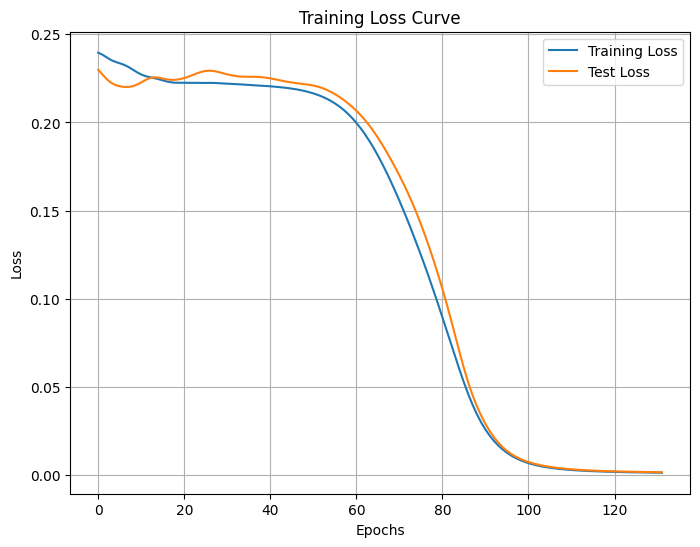

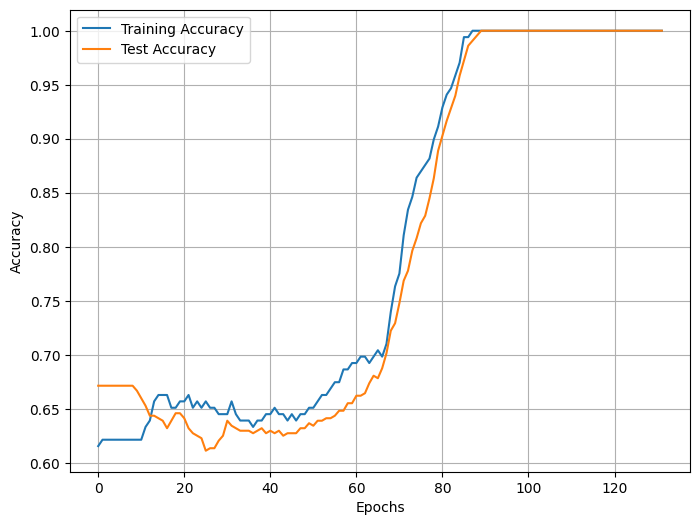

(0.005378217955832511, 1.0, 0.0017131870845332742)

In [44]:
lr = 0.6
momentum = 0.9
nesterov = False
epochs = 500
torch.manual_seed(100)
model = SimpleNN(17, 4, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov)
monk("monks-2", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=None, eps=0.00025)

# Monk3

In [8]:
lowest_loss = 1
lowest_avg_loss = 1
for lr in parameter_grid["learning_rate"]:
    for momentum in parameter_grid["momentum"]:
        for nesterov in parameter_grid["nesterov"]:
            if nesterov and momentum == 0:
                continue
            loss_across_seeds = []
            acc_across_seeds = []
            overfit_across_seeds = []
            for seed in [18, 30, 42, 69, 100]:
                torch.manual_seed(seed)
                model = SimpleNN(17, 3, 1)
                optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov and momentum > 0)
                overfit, acc, loss, = monk("monks-3", optimizer=optimizer, neural_network=model, num_epochs=500,
                                           lr_scheduler=None,
                                           verbose=False)
                loss_across_seeds.append(loss)
                acc_across_seeds.append(acc)
                overfit_across_seeds.append(overfit)

                if acc > 0.95 and overfit < 0.03:
                    if loss < lowest_loss:
                        lowest_loss = loss
                        print(
                            f"Best seed 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, loss: {loss}, acc: {acc}, overfit: {overfit}, seed: {seed}")
            avg_acc = np.mean(acc_across_seeds)
            avg_loss = np.mean(loss_across_seeds)
            if avg_acc > 0.95 and avg_loss < lowest_avg_loss and np.mean(overfit_across_seeds) < 0.03:
                lowest_avg_loss = avg_loss
                print(f"Best overall 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, loss: {avg_loss}, acc: {avg_acc}")


Best seed 3 neuron lr: 0.01, momentum: 0.9, nesterov: True, loss: 0.05457930266857147, acc: 0.9722222222222222, overfit: 0.006301063999533653, seed: 18
Best seed 3 neuron lr: 0.01, momentum: 0.9, nesterov: True, loss: 0.049691516906023026, acc: 0.9722222222222222, overfit: 0.007628910046245318, seed: 30
Best seed 3 neuron lr: 0.01, momentum: 0.9, nesterov: True, loss: 0.04966537281870842, acc: 0.9722222222222222, overfit: 0.009366882743832728, seed: 100
Best overall 3 neuron lr: 0.01, momentum: 0.9, nesterov: True, loss: 0.05130128338932991, acc: 0.9722222222222221
Best seed 3 neuron lr: 0.01, momentum: 0.9, nesterov: False, loss: 0.049573272466659546, acc: 0.9722222222222222, overfit: 0.009364262528040193, seed: 100
Best seed 3 neuron lr: 0.022040816326530613, momentum: 0.9, nesterov: True, loss: 0.0481395460665226, acc: 0.9652777777777778, overfit: 0.007301959223472155, seed: 18
Best seed 3 neuron lr: 0.022040816326530613, momentum: 0.9, nesterov: True, loss: 0.04482494667172432, acc

Overfitting Score: 0.0075


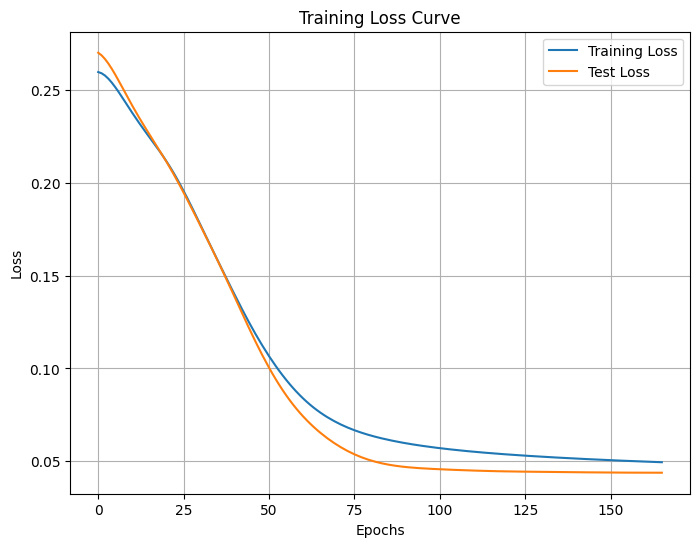

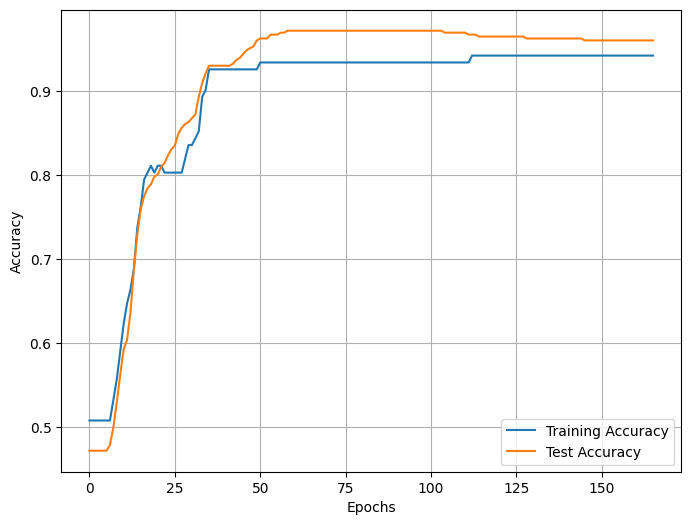

(0.007484790431447776, 0.9606481481481481, 0.0438225194811821)

In [40]:
lr = 0.058163265306122446
momentum = 0.9
nesterov = False
epochs = 500
torch.manual_seed(42)
model = SimpleNN(17, 3, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov)
monk("monks-3", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=None)

In [12]:
parameter_grid = {
    "learning_rate": np.linspace(0.2, 0.05, 30),
    "momentum": [0.0, 0.9, 0.8, 0.7],
    "nesterov": [True, False],
    "decay": np.linspace(0.001, 0.0001, 10)
}

In [13]:
lowest_loss = 1
lowest_avg_loss = 1
for lr in parameter_grid["learning_rate"]:
    for decay in parameter_grid["decay"]:
        for momentum in parameter_grid["momentum"]:
            for nesterov in parameter_grid["nesterov"]:
                if nesterov and momentum == 0:
                    continue

                loss_across_seeds = []
                acc_across_seeds = []
                overfit_across_seeds = []
                for seed in [18, 30, 42, 69, 100]:
                    torch.manual_seed(seed)
                    model = SimpleNN(17, 3, 1)
                    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov and momentum > 0,
                                          weight_decay=decay)
                    overfit, acc, loss, = monk("monks-3", optimizer=optimizer, neural_network=model, num_epochs=500,
                                               lr_scheduler=None,
                                               verbose=False)
                    loss_across_seeds.append(loss)
                    acc_across_seeds.append(acc)
                    overfit_across_seeds.append(overfit)
                    if acc > 0.965 and overfit < 0.01:
                        if loss < lowest_loss:
                            lowest_loss = loss
                            print(
                                f" Best seed 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, decay: {decay}, loss: {loss}, acc: {acc}, overfit: {overfit}, seed: {seed}")

                avg_acc = np.mean(acc_across_seeds)
                avg_loss = np.mean(loss_across_seeds)
                if avg_acc > 0.965 and avg_loss < lowest_avg_loss and np.mean(overfit_across_seeds) < 0.01:
                    lowest_avg_loss = avg_loss
                    print(f"Best overall 3 neuron lr: {lr}, momentum: {momentum}, nesterov: {nesterov}, decay: {decay}, loss: {avg_loss}, acc: {avg_acc}")


 Best seed 3 neuron lr: 0.2, momentum: 0.0, nesterov: False, decay: 0.001, loss: 0.0498790480196476, acc: 0.9699074074074074, overfit: 0.007538991183581123, seed: 18
 Best seed 3 neuron lr: 0.2, momentum: 0.0, nesterov: False, decay: 0.001, loss: 0.04634180665016174, acc: 0.9722222222222222, overfit: 0.009611649869513433, seed: 30
Best overall 3 neuron lr: 0.2, momentum: 0.0, nesterov: False, decay: 0.001, loss: 0.04757380560040474, acc: 0.9717592592592593
 Best seed 3 neuron lr: 0.2, momentum: 0.0, nesterov: False, decay: 0.0009, loss: 0.04624808207154274, acc: 0.9722222222222222, overfit: 0.009619888549227669, seed: 30
Best overall 3 neuron lr: 0.2, momentum: 0.0, nesterov: False, decay: 0.0009, loss: 0.04741193354129791, acc: 0.9717592592592593
Best overall 3 neuron lr: 0.2, momentum: 0.0, nesterov: False, decay: 0.0008, loss: 0.047341647744178775, acc: 0.9717592592592593
 Best seed 3 neuron lr: 0.2, momentum: 0.0, nesterov: False, decay: 0.0007000000000000001, loss: 0.0462031289935

Overfitting Score: 0.0096


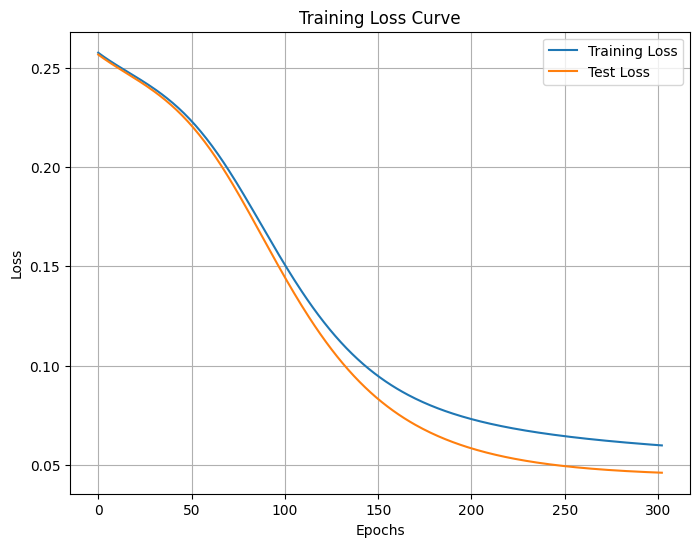

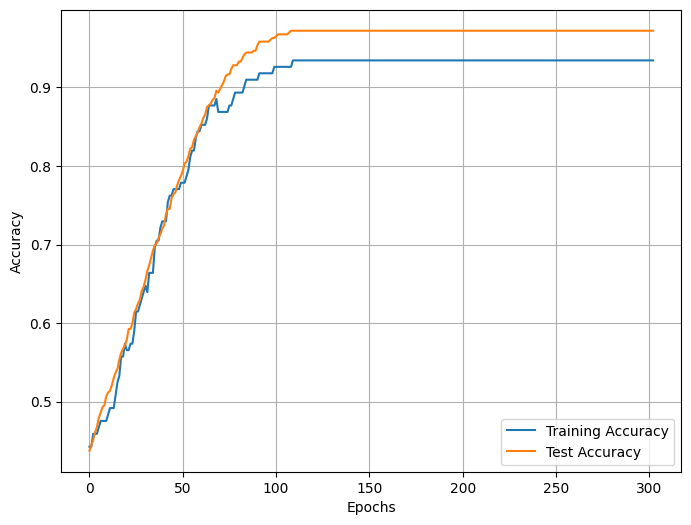

(0.009598617469615276, 0.9722222222222222, 0.04601837694644928)

In [35]:
decay = 0.0005
lr = 0.2
momentum = 0.
nesterov = False
torch.manual_seed(30)
model = SimpleNN(17, 3, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=decay, nesterov=nesterov)
monk("monks-3", optimizer=optimizer, neural_network=model, num_epochs=350, lr_scheduler=None)